## import Tensorflow

In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

1.12.0


## Obtain MNIST data

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

In [5]:
import os
os.listdir('MNIST/')

['train-labels-idx1-ubyte.gz',
 't10k-labels-idx1-ubyte.gz',
 't10k-images-idx3-ubyte.gz',
 'train-images-idx3-ubyte.gz']

In [7]:
print(type(data))
print(len(data.train.labels))

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000


## Prepare train and test data

In [13]:
print(data.train.labels.shape)
print(data.test.labels.shape)

(55000, 10)
(10000, 10)


In [14]:
print('Image Inventory')
print('----------')
print('Training: {}'.format(len(data.train.labels)))
print('Testing:  {}'.format(len(data.test.labels)))
print('----------')

Image Inventory
----------
Training: 55000
Testing:  10000
----------


## Data Visualization

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
(784,)
Shape of input data:  (28, 28)
Label (one hot vector):  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


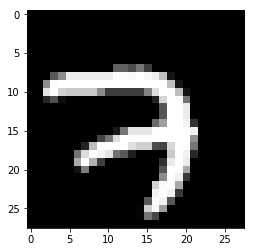

-----------------
(784,)
Shape of input data:  (28, 28)
Label (one hot vector):  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


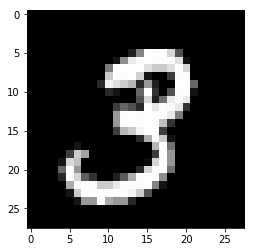

In [21]:
for i in range(2):
    image = data.train.images[i]
    image2 = np.array(image, dtype='float')
    label = data.train.labels[i]
    pixels = image2.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(image2.shape)
    print("Shape of input data: ", pixels.shape)
    print("Label (one hot vector): ", label)
    plt.show()
    

## Image Creation

In [22]:
if not os.path.exists('MNIST/images'):
    os.makedirs('MNIST/images/') ## create image folder in MNIST
os.chdir('MNIST/images/')

In [23]:
## Save sample images 
from matplotlib import image
for i in range(1,10):
    png = data.train.images[i]
    png2 = np.array(png, dtype='float')
    pixels = png2.reshape((28, 28))
    image.imsave('image_no_{}.png'.format(i), pixels, cmap = 'gray')

In [24]:
print(os.listdir())

['image_no_8.png', 'image_no_1.png', 'image_no_2.png', 'image_no_9.png', 'image_no_6.png', 'image_no_5.png', 'image_no_4.png', 'image_no_3.png', 'image_no_7.png']


## Augment the saved images

In [25]:
from Augmentor import Pipeline

In [36]:
augmentor = Pipeline('/home/kevin/KL/Apache-Spark-Deep-Learning-Cookbook-master/Chapter03/code/MNIST/images')

Initialised with 9 image(s) found.
Output directory set to /home/kevin/KL/Apache-Spark-Deep-Learning-Cookbook-master/Chapter03/code/MNIST/images/output.

In [34]:
augmentor

In [37]:
augmentor.rotate(probability=0.9, max_left_rotation=25, max_right_rotation=25)

In [38]:
for i in range(1,3):
    augmentor.sample(10)

Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FAE3B662438>: 100%|██████████| 10/10 [00:00<00:00, 257.08 Samples/s]               
Processing <PIL.Image.Image image mode=RGBA size=28x28 at 0x7FAE3B662C50>: 100%|██████████| 10/10 [00:00<00:00, 177.80 Samples/s]


## Obtain train and test data

In [42]:
x_train = data.train.images
y_train = np.asarray(data.train.labels)
x_test = data.test.images 
y_test = np.asarray(data.test.labels)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(55000, 784)
(55000, 10)
(10000, 784)
(10000, 10)


## Configure traing test data for the model

In [44]:
xtrain = x_train.reshape( x_train.shape[0],28,28,1)
xtest = x_test.reshape(x_test.shape[0],28,28,1)
ytest= y_test.reshape(y_test.shape[0],10)
ytrain = y_train.reshape(y_train.shape[0],10)

In [45]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(55000, 28, 28, 1)
(55000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Prepare and construct model

In [46]:
import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D

K.set_image_dim_ordering('tf')

model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5),activation='relu', input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))


Using TensorFlow backend.


## Compile the model

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [48]:
### Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,361,546
Trainable params: 2,361,546
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [49]:
model.fit(xtrain,ytrain,batch_size=512,
          epochs=5,
          validation_data=(xtest, ytest))

Train on 55000 samples, validate on 10000 samples
Epoch 1/5
55000/55000 [==============================] - 16s 287us/step - loss: 0.3577 - acc: 0.9010 - val_loss: 0.1201 - val_acc: 0.9650
Epoch 2/5
55000/55000 [==============================] - 15s 271us/step - loss: 0.0987 - acc: 0.9721 - val_loss: 0.0709 - val_acc: 0.9785
Epoch 3/5
55000/55000 [==============================] - 15s 269us/step - loss: 0.0621 - acc: 0.9819 - val_loss: 0.0532 - val_acc: 0.9833
Epoch 4/5
55000/55000 [==============================] - 15s 272us/step - loss: 0.0461 - acc: 0.9867 - val_loss: 0.0456 - val_acc: 0.9837
Epoch 5/5
55000/55000 [==============================] - 15s 274us/step - loss: 0.0346 - acc: 0.9895 - val_loss: 0.0601 - val_acc: 0.9806


## Evaludate the trained model

In [51]:
stats = model.evaluate(xtest, ytest)
print("Stats : ", stats)
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

10000/10000 [==============================] - 2s 218us/step
Stats :  [0.06012644720850512, 0.9806]
The accuracy rate is 98.1%
The loss rate is 6.0%


## Predict with the trained model

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


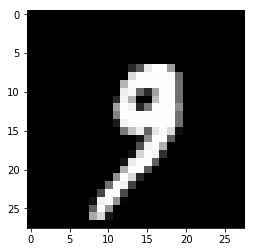

Predicted value using trained model :  9


In [71]:
test = 1000
print(ytest[test])
plt.imshow(xtest[test].reshape(28,28), cmap='gray')
plt.show()
result = model.predict(xtest[test].reshape(1,28,28,1))
print("Predicted value using trained model : ", np.argmax(result))
